In [1]:
# RNN, 자연어 처리, YOLO, GAN(유사 이미지 생성기술)
# rnn은 순환 신경망으로 표현한다. 입력과 출력을 시퀀스 단위로 처리하는 모델이다. 
# 가령 번역기를 예로 들면 된다. 단어들의 시퀀스로 표현된 문장에서 인풋,
# 번역하고자 하는 문장, 출력, 번역된 문장으로 나올 것이다. 
# RNN은 가장 기본적인 시퀀스 모델이다. RNN의 문제점을 개선한 것이 LSTM이다. 
# 딥러닝의 꽃은 RNN이다. 딥러닝은 예측모델을 만들때 사용되어진다. 
# 과거부터 현재까지 축적된 데이터로 패턴을 찾아내고 미래를 예측하는 작업을 수행한다. 
# 지난 시간에는 기본적인 신경망을 배웠다. 입력 -> 히든레이어 -> 히든레이어... -> 출력
# 순환신경망은 기존의 구조와 다르게 이전 셀에서 출력된 값이 다음셀에도 출력되는 구조이다.
# 바닐라 뉴럴 네트워크가 가장 기본적인 신경망이다. 1입력, 1출력 형식이다.(one to one)
# 나아가 1입력 다출력, 다입력 1출력, 다입력 다출력 방식 등 여러개가 존재한다. 이게 RNN이다. 

# 사진 한장 주고 사진에 등장하는 인물/배경을 보고 사진을 설명한다면 1입력 다출력이다.(one to many)
# 이미지 캡셔닝이라고 한다. 
# 여러 요소를 주문받아서 1개의 사진으로 출력하라는 것. 그것이 다입력 1출력이다.(many to one)
# 감성분석도 여기에 해당된다. 말의 흐름을 보고 긍정적 글인지 부정적 글인지 파악하는 것이다.
# 긍정/부정, 합격/불합격 등 많은 이진분류에 사용된다. 
# 번역기처럼 하나의 문장이 여러단어의 시퀀스라면 그 시퀀스를 다른 언어 시퀀스로 바꾸는 것이 다입력 다출력이다. (many to many)

# 일반 신경망과 차이점이 있다면 히든계층에서 바로 출력으로 가지 않는다. 다른 히든계층으로 간다.
# RNN알고리즘은 시간이 가미된 학습방법이다. 자연어 처리에서 가장 많이 사용된다. 
# 이전의 무슨단어가 나왔는지에 따라 다음단어로 이어지는 예측을 할 수도 있다.
# 히든계층의 RNN버젼을 RNN셀이라고 한다. 히든계층이라고 하지 않는다. 
# 렐루, 소프트맥스, 시그모이드가 사용되었던 기존 딥러닝과 달리 RNN은 tanh가 사용된다. 
# 오늘은 주식예측하는 것을 연습삼아서 만들것이다. many to one으로 될 것이다. 
# 주가를 결정하는 여러 요인들이 투입될 것이다. 정치,경제,사회뉴스, 환율 등 다양한 정보들이 올라갈 것이다.
# many to one구조는 많이 쓰인다. 
# RNN은 순환계층 / 시계열 데이터에 적절한 구조이다. 
# 삼성전자 주가 데이터를 가지고 내일의 종가를 예측하는 모델을 제작 할 것이다. 


In [2]:
# 우리말을 영어로 번역하는데 영어 - 일본어 - 한국어로 번역하는게 품질이 좀 더 좋은 특징이 있다.
# 반대로 말하면 영어 - 일본어 번역이 상대적으로 깔끔하다는 뜻이다. 요즘에는 RNN을 번역용으로 안쓴다. 
# 공부하는 이유는 RNN이 가장 베이스기 때문이다. 다른 딥러닝의 기초가 된 것이 RNN이기 때문이다. 
# RNN의 특징에 대해서는 알아 둘 필요가 있다. GPT도 RNN에서 출발했다.

In [3]:
# 비디오는 찰나의 순간이 여러개가 모여서 만들어졌다. 여러 프레임의 연속모임이다. 
# 비디오를 분류할때도 RNN구조가 활용된다. 
# 금요일에 필기체를 인식할때도 500x150x3이었다. 
# 비디오는 프레임레벨이 모여있다. 만약 300x400x3의 프레임이 1000개라면 1000x300x400x3과 같은 4차원 단위가 된다.
# FPS개념이 있다. 초당 프레임이다. 즉 60프레임은 초당 60개의 프레임이 나온다는 것이다. 
# 유튜브 영상을 해석해서 영화의 주제/특징같은 정보를 이용해서 자동으로 자막을 생성하는 AI를 만드는 연구가 이루어진다.
# RNN은 활용범위가 굉장히 넓다. 

In [4]:
# 시퀀스의 길이 (단어의 길이)에 관계없이 입력과 출력을 할 수 있는 구조이다. 매우 유연하다.
# RNN에 대한 수식은 다음과 같다. 
# h(t) = fW(ht-1,xt)
# 풀어서 쓰면 출력값 = 파라미터 함수(이전상태의 출력값, 입력벡터값)로 표현된다. 
# 그림으로 그리면 다음과 같다.
# 투입      RNN 내부  출력
#          | RNN |
#          | ||  |
# X ------>| RNN |  - > h(t)
#          | ||  |
#          | RNN |
# 
# 즉 RNN 내부에서 이전 출력값을 전달받는 작업도 추가된다. 입력 + 이전값이 RNN의 재료이다. 

In [5]:
# RNN내부의 값은 식으로 나타내면 다음과 같다. 
# ht = tanh(Whh*(ht-1) + Wxh*xt + bh))
# 무슨 소리냐 싶겠지만 다음과 같다.
# 출력값 = 쌍곡탄젠트(이전RNN값 + 인풋값 + 바이어스값)
# 아웃풋은 다음과 같다.
# yt = Why + by 
# 결과값 = 현재의 RNN값 + 또다른 바이어스값
# 한글로 풀어놓으니 좀 살거같다.
# 여기서 투입값의 가중치(w)는 각 요소의 중요도에 따라 다르게 투입된다. 
# 재밌는 것은 다음 RNN셀을 이동할 때 투입되는 인풋은 기본인풋/이전값/백프라퍼케이션이 들어가는 것이다. 
# RNN네트워크를 구성할 때 셀이 여러개가 이어지는 구조로 설계된다. 
# RNN출력시에는 또다른 활성화함수를 연결한다. 또는 F.C(풀리 커넥티드 레이어)가 나오기도 한다.
# 즉 DNN으로 전송하여 2차 딥러닝이 이어지기도 한다.


In [6]:
# 다음 문자가 어떤 식으로 연결되는지 알아보자
# vocabulary : h, e ,l ,o (코퍼스(말뭉치)를 구성하는 전체 단어들의 집합) 문자 4개로 구성되어있다.
# 여기서 이 문자를 기반으로 예측한다면? 문자 4개를 기반으로 다음 문자를 예측하는 모델을 만들고자 한다. 
# h(1,0,0,0),e(0,1,0,0),l(0,0,1,0),l(0,0,1,0),o(0,0,0,1) 출력은 이와 같이 이루어질 것이다. 
# 히든 레이어에는 다음과 같은 과정이 벌어질 것이다.
# 0.3  ---- 1.0 ----  0.1 ---- -0.3    
# -0.1 ---- 0.3 ---- -0.5 ----  0.9
# 0.9  ---- 0.1 ---- -0.3 ----  0.7
#  h        e          l         l
# 이런 식으로 진행될 것이다. (무슨말인지 알 수가 없다)
# 현재는 코퍼스 크기인 4차원 구조이다. 
# 가중치변수는 글자에서 히든레이어로 전달된다. 가중치는 모든 글자에서 공유된다. 
# 히든레이어의 차원은 우리가 정하는 것이다. 

In [ ]:
# 문제점
# RNN은 이미지로부터 이미지 부분을 설명하는 것도 가능하다. 
# RNN은 그럼에도 문제점을 가지고 있다.
# 시계열 데이터를 이용하기에 좋으나 장기의존성 문제가 발생한다. 
# LSTM(long short term memory) 관련 사이트는 다음과 같다.
# https://colah.github.io/posts/2015-08-Understanding-LSTMs/`
# RNN결과는 이전 결과값에도 의존적이다. 또한 짧은 시퀀스에 유용하나 
# 시퀀스가 길어지면 후방의 정보가 앞으로 가지않는 문제가 발생한다. 즉 초기정보의 손실이 발생한다.
# 시점이 많을수록 전체 정보가 영향력을 잃어버릴 수 있다. 결과가 제대로 안나오는 문제가 생길 수 있다.
# 예를 들어 초반에 자신이 프랑스인이라고 말했는데 중간소개가 길어지면 마지막에 소개한 사람이 프랑스인인것을 잊어먹는다.
# 사람은 초반에 프랑스인인것을 인식하고 프랑스어를 할 것이라고 유추하지만 RNN은 그렇지 못하다. 
# 시간이 흐름에 따라 짧은 시퀀스(프랑스인)는 점점 사라지는 것이다. 이게 장기의존성 문제이다.
# RNN은 장기의존성 문제를 피할 수 없다. 
# LSTML구조는 다르다. RNN의 단점을 완하기 위한 구조인데 LSTM의 히든계층에 입력게이트, 망각게이트, 출력게이트를 추가했다.
# 뒷쪽에서 중요하게 사용될 정보를 기억시킨다. 그러한 과정을 히든계층에서 판단하는 것이다. 
# 그래서 수식이 매우 복잡해졌다. 특정상태의 셀을 나타내기도 한다.


In [7]:
# LSTM 구조
# LSTM은 긴 시퀀스를 처리하는데 성능이 확연히 좋아졌다. 내부에 시그모이드가 3개나 들어간다. 
# LSTM구조는 다음과 깉이 편성된다.
# 1. 셀 스테이트 : 모든 셀들에 걸쳐서 연결되어져 있는 선이다. 컨베이어 벨트와 유사하다. 
# 정보가 컨베이어벨트를 따라서 계속 이동하는 모양이다. 
# 2. 게이트 : LSTM은 게이트가 여러 개가 존재한다. 구조에 따라 세심하게 조종되는 게이트들이다. 
# 값이 중요하면 다음셀에도 전달하고 중요하지 않으면 제거한다. 만약 그 값이 중요하면 추가할 수도 있다. 
# 정보를 전달하는데 있어서 선택적으로 정보를 전달하는 역할을 한다. 역할은 전부 다르지만 선택적성격이 공통적이다.
# 상황에 맞춰서 선택적으로 정보를 전달하는 것이다. 기억할건 기억하고 잊어버릴건 잊어버린다. 
# 이걸 학습을 통해 훈련을 하면 모델이 만들어지는데 그 와중에 업데이트되는 것이 게이트이다. 
# LSTM에서는 크게 3가지 게이트가 존재한다.
# 시그모이드 레이어 : 시그모이드를 통과하면 값은 0에서 1사이로 바뀐다. 
# 시그모이드에서 X에 곱연산을 하게 된다. 시그모이드가 1이면 전달, 0이면 차단인 식이다. 
# 시그모이드는 전달정보의 양을 조절한다.


In [8]:
#LSTM 작동 매커니즘
# 1. 망각 게이트 : 앞쪽에 있는 모든 셀들의 상태정보를 먼저 받는다. 그것을 0~1사이를 곱한다.
# 전체 정보에 대해서 어느 정도 전달하는지 결정하는 게이트이다. 
# 앞에 있는 단어를 기반으로 다음 단어를 예측하고자 한다. 그러한 언어모델을 만들고자 한다. 
# 셀에 대한 상태값이 만약에 성별이라고 하자. 셀에 대한 상태정보가 성별에 대한 내용을 담고있다면(her, mr)
# 포함된 정보가 정상적으로 전달이 되었다면 올바른 대명사를 사용할 수 있을 것이다. 

# 아예 새로운 주제를 이야기하려고 한다면? 이전의 내용과는 전혀 다른 이야기이다. 이전의 정보는 필요하지 않다. 
# 그렇다면 망각을 할 필요가 존재한다. 어떤 정보를 남겨두고 어떤 정보를 제거할지 결정하는 역할이다. 

# 2.인풋 게이트 레이어 : 어떤 정보를 새롭게 저장할지 결정하는 게이트이다. 입력 게이트라고 한다.
# 현재 정보와 이전정보를 받아서 어느정도 저장할지 결정한다. 
# 셀스테이트에 새로운 정보가 들어왔다. 그 정보는 성별에 대한 정보라고 하자.
# 기존의 정보를 버리고 현재 셀에 저장되는 새로운 정보를 활용하는 게이트이다. 

# 여기까지 과거의 정보(망각 게이트), 현재의 정보(인풋 게이트 레이어)까지 컨베이어 벨트에서 움직인다. 

# 3. 출력 게이트 : 출력을 결정하는 게이트가 있다.
# 출력값은 출력부분 뿐 아니라 다음 망각게이트에도 전달된다. 
# 과거정보, 현재정보를 쌍곡탄젠트로 계산한 것을 현재값에 시그모이드를 취한 값과 곱해서 출력한다.

# LSTM은 순서가 중요하고 과거의 정보가 중요한 경우에 많이 사용된다. 

In [9]:
# LSTM 주가예측 기초
# 파이낸스 리더 파이선 패키지를 이용하자
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
import FinanceDataReader as fdr
# 안되면 pip install finance-datareader를 설치해야 한다.
# 야후 파이낸스쪽에서 관심을 가지고있는 종목을 가지고 와보자

In [12]:
kakao = fdr.DataReader('035720') # 카카오 데이터를 가져와보자, 한국데이터는 6자리코드, 미국은 약어로 된다.
kakao.shape

(5920, 6)

In [13]:
kakao # 과거부터 현재까지의 주가를 확인한다. 시가, 고가, 저가, 종가 , 거래량, 대비 순으로 있다.


,Open,High,Low,Close,Volume,Change
Date,,,,,,
1999-11-11,999,999,999,999,12,NaN
1999-11-12,1115,1115,1115,1115,140,0.116116
1999-11-15,1249,1249,1249,1249,405,0.120179
1999-11-16,1396,1396,1396,1396,214,0.117694
1999-11-17,1561,1561,1561,1561,191,0.118195
...,...,...,...,...,...,...
2023-10-31,38250,38950,37450,37800,1791726,-0.005263
2023-11-01,38000,38300,37450,37600,1272093,-0.005291
2023-11-02,38000,38600,37900,38550,1529650,0.025266


In [16]:
fdr.DataReader('AAPL','1981','1982') # 일정 기간을 주는 것도 가능하다. 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1981-01-02,0.154018,0.155134,0.154018,0.154018,0.119340,21660800
1981-01-05,0.151228,0.151228,0.150670,0.150670,0.116746,35728000
1981-01-06,0.144531,0.144531,0.143973,0.143973,0.111556,45158400
1981-01-07,0.138393,0.138393,0.137835,0.137835,0.106800,55686400
1981-01-08,0.135603,0.135603,0.135045,0.135045,0.104639,39827200
...,...,...,...,...,...,...
1981-12-24,0.097656,0.098214,0.097656,0.097656,0.075668,28918400
1981-12-28,0.094308,0.094308,0.093192,0.093192,0.072209,36579200
1981-12-29,0.094866,0.095982,0.094866,0.094866,0.073506,24236800


In [17]:
fdr.DataReader('AAPL','1981-01-01','1982-12-30') # 날짜도 기입 가능하다.
#  https://github.com/FinanceData/FinanceDataReader 여기에 많은 자료들이 있다. 하단에 목차가 존재한다.

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1981-01-02,0.154018,0.155134,0.154018,0.154018,0.119340,21660800
1981-01-05,0.151228,0.151228,0.150670,0.150670,0.116746,35728000
1981-01-06,0.144531,0.144531,0.143973,0.143973,0.111556,45158400
1981-01-07,0.138393,0.138393,0.137835,0.137835,0.106800,55686400
1981-01-08,0.135603,0.135603,0.135045,0.135045,0.104639,39827200
...,...,...,...,...,...,...
1982-12-22,0.135603,0.138951,0.135603,0.138951,0.107665,101225600
1982-12-23,0.138951,0.142857,0.137835,0.142857,0.110692,86979200
1982-12-27,0.142857,0.146763,0.141741,0.146205,0.113286,61868800


In [19]:
kakao.index # 날짜가 인덱스이다. datetime으로 되어있어서 마음껏 쪼개는 것이 가능하다. 

DatetimeIndex(['1999-11-11', '1999-11-12', '1999-11-15', '1999-11-16',
               '1999-11-17', '1999-11-18', '1999-11-19', '1999-11-22',
               '1999-11-23', '1999-11-24',
               ...
               '2023-10-24', '2023-10-25', '2023-10-26', '2023-10-27',
               '2023-10-30', '2023-10-31', '2023-11-01', '2023-11-02',
               '2023-11-03', '2023-11-06'],
              dtype='datetime64[ns]', name='Date', length=5920, freq=None)

In [21]:
kakao['year'] = kakao.index.year    # 연도, 월, 일도 추출 가능하다. 
kakao['month'] = kakao.index.month  
kakao['day'] = kakao.index.day

Text(0, 0.5, 'price')

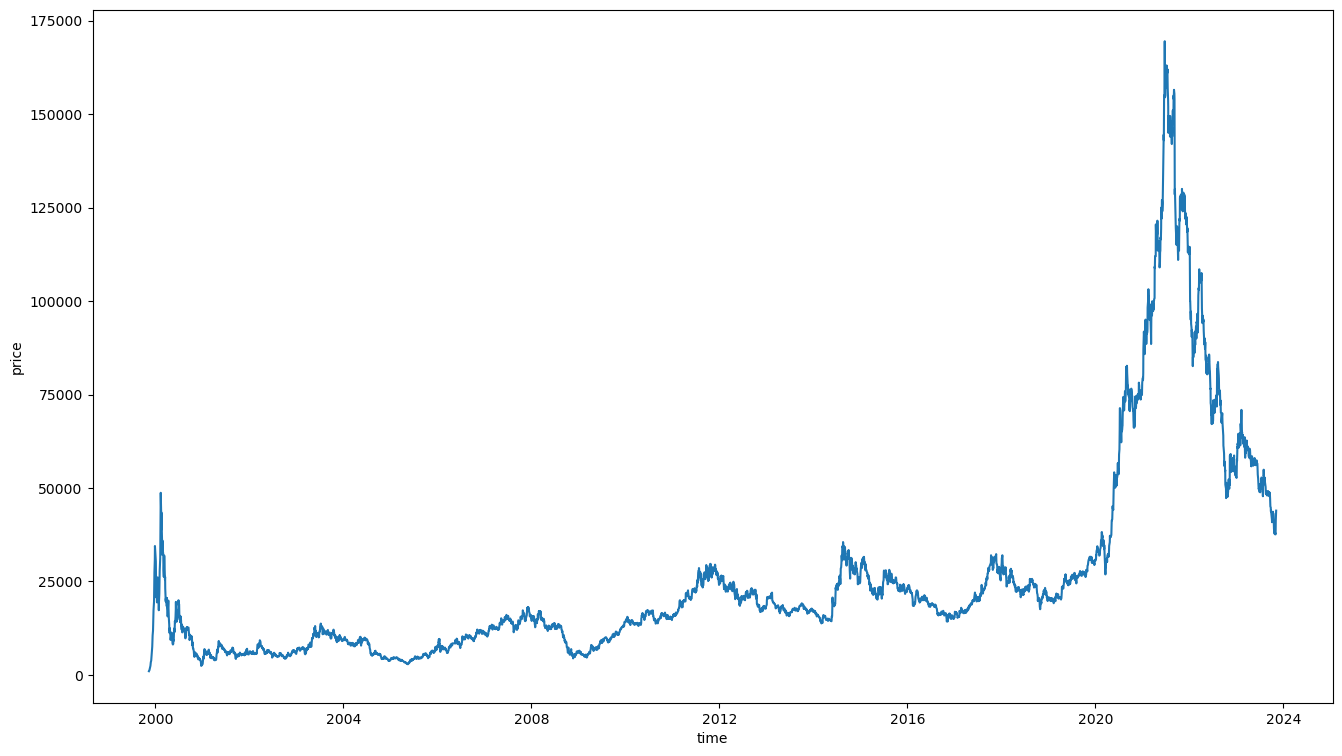

In [23]:
# 기간이 너무 길어서 선 그래프로 그려야 할 듯 하다. 
plt.figure(figsize = (16,9))
sns.lineplot(y = kakao['Close'],x = kakao.index)
plt.xlabel('time')
plt.ylabel('price')
# 꽤 보기 어렵다. 너무 많은 기간을 보기 때문이다. 
# 연도별로 나눠서 보는 것도 필요할 것이다. 

In [24]:
ts = [['2000','2010'],
      ['2010','2015'],
      ['2015','2020'],
      ['2020','2023']]

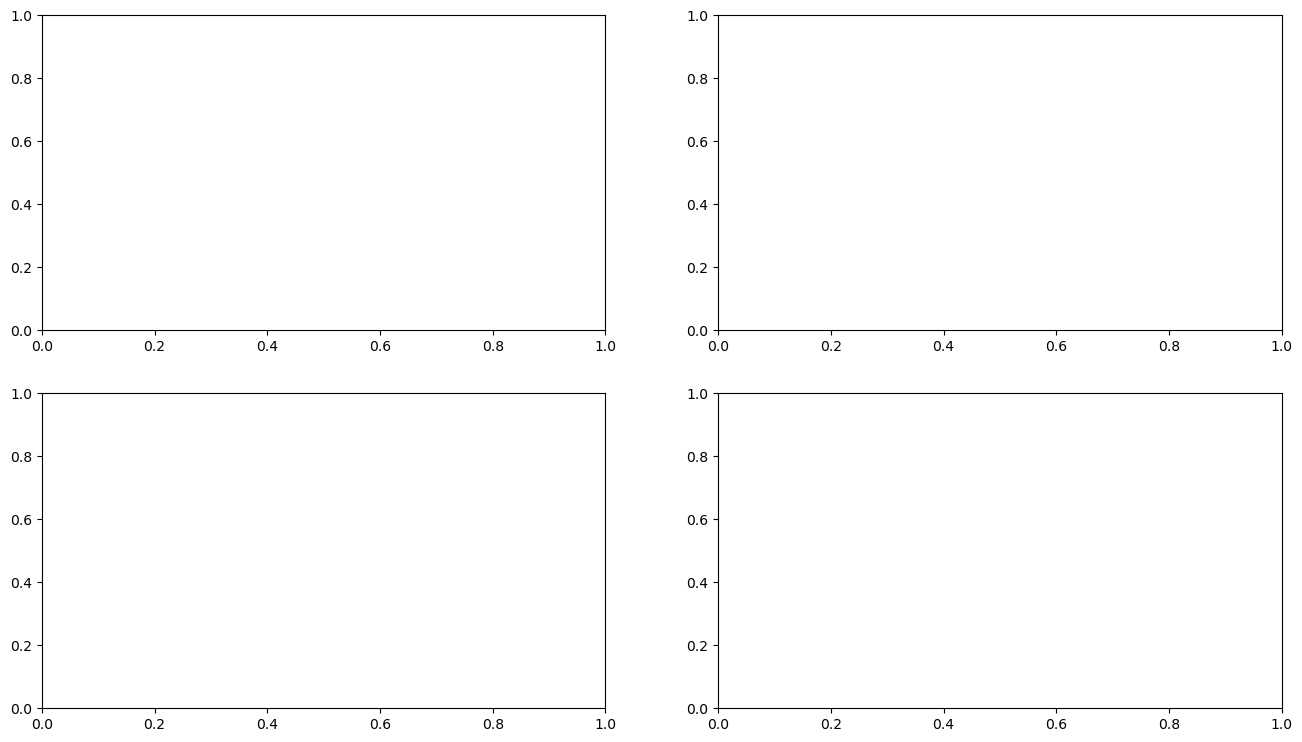

In [26]:
fig,axes = plt.subplots(2,2)
fig.set_size_inches(16,9)     # 깔끔한 도화지가 만들어졌다.

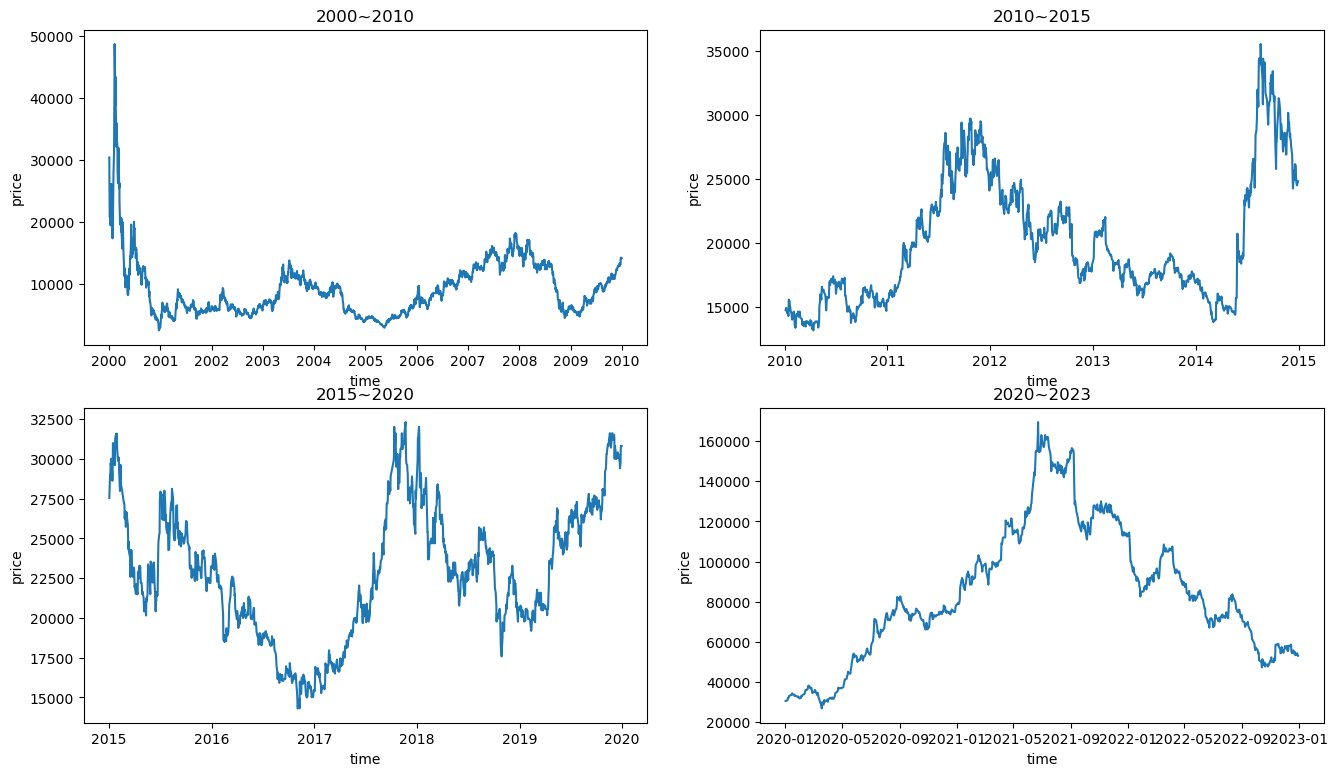

In [27]:
fig,axes = plt.subplots(2,2)
fig.set_size_inches(16,9)    
for i in range(4):
    ax = axes[i//2, i%2]                                                    # 0 = (0,0), 1 = (0,1), 2(1,0),3,(1,1)
    df = kakao.loc[(kakao.index > ts[i][0]) & (kakao.index <ts[i][1])]      # 인덱스별 해당위치 자르기
    sns.lineplot(y=df['Close'], x=df.index, ax=ax)                          # 라인플롯은 close를 기준으로
    ax.set_title(f'{ts[i][0]}~{ts[i][1]}')                                  # 타이틀 이름은 위에 있는 이름으로 사용
    ax.set_xlabel('time')
    ax.set_ylabel('price')

In [28]:
# volume은 정규화, 표준화작업이 필요할 것이다. 폭이 상당히 크다. 
# 종가를 설계하려면 어떻게 해야할까? 전날것만 예측하는 것은 무리일 것이다. 
# 특정 기간동안의 특정 데이터를 기반으로 확인해야 할 것이다. 
# 3일 동안의 주가데이터의 변화를 기준으로 하면 11월 1~11월 3일이 x이다.  11.6이 타겟이다. 
# 이걸 박스단위로 묶어서 조사하는 것이다. 윈도우 슬라이딩 방식이다. 
# 이걸 트레이닝을 한다면 맨 위의 3일데이터를 기준으로 결국 6일 종가 하나만 출력해야한다. 
# 애러를 줄이기 위해서 백프라퍼게이션을 계속 하게 된다. 이러한 구조로 수행하는 것이다. 
# 일단 날짜는 중요하지 않을 것이다. 날짜가 오르는 기준이 된다면 이미 많은 사람들이 돈을 벌었을 것이다. 
# minmaxscaler를 통해 정규화를 해보자. 
# 투자를 한다면 일반적으로 강화학습을 많이 한다. 
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler = MinMaxScaler()

In [37]:
cols = ['Open', 'High', 'Low', 'Close', 'Volume']

In [38]:
scaled = scaler.fit_transform(kakao[cols])
scaled

array([[5.80813953e-03, 5.77456647e-03, 6.20496894e-03, 0.00000000e+00,
        6.35083673e-07],
       [6.48255814e-03, 6.44508671e-03, 6.92546584e-03, 6.88423214e-04,
        7.40930952e-06],
       [7.26162791e-03, 7.21965318e-03, 7.75776398e-03, 1.48367072e-03,
        2.14340740e-05],
       ...,
       [2.20930233e-01, 2.23121387e-01, 2.35403727e-01, 2.22853277e-01,
        8.09546451e-02],
       [2.28197674e-01, 2.40173410e-01, 2.41614907e-01, 2.39173655e-01,
        1.94519990e-01],
       [2.50000000e-01, 2.55491329e-01, 2.62732919e-01, 2.54900564e-01,
        2.01906066e-01]])

In [39]:
df = pd.DataFrame(scaled, columns=cols)
df
# 모든 값들은 정규화되었다. 

,Open,High,Low,Close,Volume
0,0.005808,0.005775,0.006205,0.000000,6.350837e-07
1,0.006483,0.006445,0.006925,0.000688,7.409310e-06
2,0.007262,0.007220,0.007758,0.001484,2.143407e-05
3,0.008116,0.008069,0.008671,0.002356,1.132566e-05
4,0.009076,0.009023,0.009696,0.003335,1.010842e-05
...,...,...,...,...,...
5915,0.222384,0.225145,0.232609,0.218402,9.482466e-02
5916,0.220930,0.221387,0.232609,0.217215,6.732379e-02
5917,0.220930,0.223121,0.235404,0.222853,8.095465e-02
5918,0.228198,0.240173,0.241615,0.239174,1.945200e-01


In [40]:
from sklearn.model_selection import train_test_split

In [41]:
xtrain,xtest,ytrain,ytest = train_test_split(df.drop("Close",1),df['Close'], test_size=0.2, random_state=0, shuffle=False) # 시간의 흐름이기 때문에 셔플옵션을 꺼야한다. 



C:\Users\user\AppData\Local\Temp\ipykernel_11100\3808492753.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  xtrain,xtest,ytrain,ytest = train_test_split(df.drop("Close",1),df['Close'], test_size=0.2, random_state=0, shuffle=False) # 시간의 흐름이기 때문에 셔플옵션을 꺼야한다.


In [42]:
xtrain.shape # 분리가 잘 된거 같다. 

(4736, 4)

In [43]:
xtest.shape

(1184, 4)

In [44]:
# 일정기간을 묶어서 훈련하는 식으로 해보면 어떨까?
# 모델을 만들기 전에 구조를 먼저 파악해야 한다. 
# https://wikidocs.net/22886
# 여기에 자세히 나와있다.
# hidden_units는 출력차원이다. 히든 상태의 크기를 말하는 것이다. 
# 만약 input을 한다면 유닛, 인풋값을 투입하게 된다. timesteps는 기간, input_dim은 기간별 투입요소이다. 
# timesteps가 3이고 input_dim이 4인 케이스이다. close가 답이기 때문이다. 
# 그리고 출력은 맨 마지막에서만 이루어지면 된다. 다 : 1구조이다. 
# input_dim은 1차원일때 쓴다. 
# input_shape는 인풋값이 1차원을 초과할때 쓴다. 
# 결론적으로 RNN에서 배치사이즈, 타입스텝, 인풋 순으로 설계를 한다. 

# return_sequences = True 이 여부는 상당히 중요하다. 만약 False로 하면 1개만 출력된다.
# 하지만 True로 하는 순간 각각의 RNN에서 출력이 이루어진다. 
# 은닉상태에서 출력은 두 가지의 출력이 이루어진다. 최종에만리턴을 한다면 배치사이즈, 아웃풋만 입력한다.
# 하지만 모든 시퀀스를 추출하려면 배치사이즈, 시간, 아웃풋의 3개를 사용해야 한다.
# 아웃풋 출력 디멘젼의 의미는 한 배치당 이루어진 속성값들을 정해진 갯수의 아웃풋 값으로 표현된 것이다. 
# 배치사이즈가 16이면 아웃풋은 (16,2) 이런 식으로 나올 수 있다.
# 여기서 F.C(풀리 커넥티드)가 작용해서 학습이 계속 이뤄진다. 
# return_sequences가 False인 경우 모든 시퀀스를 구성하는데 최종것만 제외하고 전부 날린다는 거다. 하나빼고
# True는 모든 결과를 도출한다. 도출결과는 hidden_units에서 결정 가능하다.
# 만약 번역기를 쓴다면 모든 결과가 나와야 하기 때문에 True가 나와야 한다. 
# 긍정/부정을 출력한다면 False가 되어야 한다. False는 결론을 원할 때 쓴다. 


In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN

model = Sequential()
model.add(SimpleRNN(3, input_shape=(2,10)))       # 출력 3, 타임스텝 2, 인풋 디멘젼 10이라는 의미이다. 
# model.add(SimpleRNN(3, input_length=2, input_dim=10))와 동일함.
model.summary()
# 구조는 이런 식으로 되어진다. 
# (이전출력)
# 인풋(1),인풋 |    |
# 인풋(1),인풋 | R  |
# 인풋(1),인풋 |    |
# 인풋(1),인풋 | N  |---출력
# 인풋(1),인풋 |    |
# 인풋(1),인풋 | N  |---출력
# 인풋(1),인풋 |    |
# 인풋(1),인풋 |    |---출력
# 인풋(1),인풋 |    |
# 인풋(1),인풋 |    |
#
# 배치사이즈가 현재 단계에서 알 수 없으면 (None,3) 이런식으로 출력된다. 결과가 저렇게 나온 이유이다. 
# 그리고 return_sequences = False가 디폴트다. True로 설정할 필요가 있다면 별도로 지정해야한다.


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 3)                 42        
                                                                 
Total params: 42 (168.00 Byte)
Trainable params: 42 (168.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
model = Sequential()
model.add(SimpleRNN(3, batch_input_shape=(5,3,4)))
model.summary()
# 학습을 할때 이걸 하나만 가지고 학습을 하는 경우 배치사이즈는 1이다. 그러면 None이 표시되지 않는다. 
# 3일씩 계산하고 4개의 요소값을 투입하는 것을 1배치라고 가정했을때 5배치로 설정 
# 아웃풋은 3개로 정하고 출력하였음.  

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_3 (SimpleRNN)    (5, 3)                    24        
                                                                 
Total params: 24 (96.00 Byte)
Trainable params: 24 (96.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [49]:
model = Sequential()
model.add(SimpleRNN(3, batch_input_shape=(8,2,10), return_sequences=True))
model.summary()
# return_sequences=True 모든 시퀀스에서 아웃풋이 이루어졌다.
# 2일 10인풋 8배치 기준 아웃풋 3개 출력. 이번건 3개 다 출력

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (8, 2, 3)                 42        
                                                                 
Total params: 42 (168.00 Byte)
Trainable params: 42 (168.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
# 원리를 먼저 알아보자. 
# 기간은 10일이고 투입은 4차원, 출력은 8차원이다.
import numpy as np

timesteps = 10
input_dim = 4
hidden_units = 8

# 입력에 해당되는 2D 텐서
inputs = np.random.random((timesteps, input_dim))
inputs
# 처음 편성은 이렇게 된다. 랜덤한 숫자들이 추출되었다.

array([[0.33909239, 0.2612449 , 0.82533687, 0.19609386],
       [0.68618799, 0.48644259, 0.50857979, 0.68471039],
       [0.44533163, 0.48511194, 0.69712905, 0.62662547],
       [0.38552143, 0.85131895, 0.8899479 , 0.54997682],
       [0.71173393, 0.52645818, 0.95368882, 0.04561916],
       [0.98908234, 0.61919503, 0.30734349, 0.28439723],
       [0.54110612, 0.60068586, 0.18854901, 0.41565693],
       [0.70460071, 0.12804476, 0.41473999, 0.98234836],
       [0.72311173, 0.88003042, 0.47600184, 0.21980385],
       [0.36454669, 0.61708648, 0.53180614, 0.44228519]])

In [52]:
# 초기 은닉 상태는 0(벡터)로 초기화
hidden_state_t = np.zeros((hidden_units,)) 

print('초기 은닉 상태 :',hidden_state_t)
# 여기서 출력되는 것은 먼저 0으로 아무것도 없게 만든다. 

초기 은닉 상태 : [0. 0. 0. 0. 0. 0. 0. 0.]


In [53]:
Wx = np.random.random((hidden_units, input_dim))     # (8, 4)크기의 2D 텐서 생성. 입력에 대한 가중치.
Wh = np.random.random((hidden_units, hidden_units))  # (8, 8)크기의 2D 텐서 생성. 은닉 상태에 대한 가중치.
b = np.random.random((hidden_units,))                # (8,)크기의 1D 텐서 생성. 이 값은 편향(bias).

print('가중치 Wx의 크기(shape) :',np.shape(Wx))
print('가중치 Wh의 크기(shape) :',np.shape(Wh))
print('편향의 크기(shape) :',np.shape(b))

가중치 Wx의 크기(shape) : (8, 4)
가중치 Wh의 크기(shape) : (8, 8)
편향의 크기(shape) : (8,)


In [54]:
total_hidden_states = []

# 각 시점 별 입력값.
for input_t in inputs:

  # Wx * Xt + Wh * Ht-1 + b(bias)
  output_t = np.tanh(np.dot(Wx,input_t) + np.dot(Wh,hidden_state_t) + b)

  # 각 시점 t별 메모리 셀의 출력의 크기는 (timestep t, output_dim)
  # 각 시점의 은닉 상태의 값을 계속해서 누적
  total_hidden_states.append(list(output_t))
  hidden_state_t = output_t

# 출력 시 값을 깔끔하게 해주는 용도.
total_hidden_states = np.stack(total_hidden_states, axis = 0) 

# (timesteps, output_dim)
print('모든 시점의 은닉 상태 :')
print(total_hidden_states)

모든 시점의 은닉 상태 :
[[0.86348361 0.91078909 0.92445596 0.95489982 0.90009955 0.93100502
  0.90185991 0.96438085]
 [0.99976946 0.99985918 0.99984059 0.99995234 0.99952181 0.9999649
  0.99983878 0.99996917]
 [0.99984611 0.99990494 0.99987151 0.99996955 0.99957211 0.99997772
  0.99988578 0.99998229]
 [0.99991458 0.99992523 0.99993731 0.99998562 0.99965084 0.99998215
  0.99989765 0.99998928]
 [0.99980996 0.99988118 0.9999077  0.99997733 0.99920827 0.99998762
  0.99992579 0.99998433]
 [0.99985671 0.99989662 0.99992917 0.99997598 0.99952133 0.99998714
  0.99993075 0.99997763]
 [0.99981939 0.99986087 0.99985459 0.99995611 0.99933587 0.99997172
  0.99985187 0.9999601 ]
 [0.99980776 0.99991938 0.99982602 0.99995368 0.99973945 0.9999787
  0.9999098  0.99998037]
 [0.99989232 0.99989708 0.99994158 0.99998222 0.99946848 0.99998485
  0.99991044 0.99998054]
 [0.99983466 0.99987547 0.99985912 0.9999645  0.99936209 0.99997224
  0.99984926 0.99997283]]


In [ ]:
# 양방향 순환 신경망은 이전시점, 이후시점 둘 다 사용하는것과 같다. 
# 